# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS
## Week 7 - Waves

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

## Preamble: Relaxation Method

### Relaxation Method for non-linear equations

We aim to solve

\begin{equation}
x + e^{-2x} = 1.
\end{equation}

We could rewrite this equation in the form of $x = f(x)$ and iterate until we find a convergent $x_0$ value. One possibility is

\begin{equation}
x  = 1 + e^{-2x}, 
\end{equation}
in this form, $f(x) = 1 + e^{-2x}$.

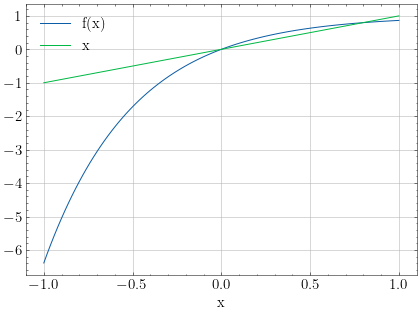

In [59]:
# Inspecting the problem graphically

def f(x):
    return 1 - np.exp(-2*x)

x = np.linspace(-1, 1, 101)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, x, label='x')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

In [60]:
# Writting our relaxation function

def relaxation_method(f, x0, N=100, tol=1e-6):
    x_old = x0
    for i in range(N):
        x_new = f(x_old)
        if abs(x_new - x_old) < tol:
            print(f'Converged at x = {x_new} after {i+1} iterations.')
            break
        x_old = x_new
    else:
        print(f'Convergence failed. Last x = {x_new}.')

In [61]:
# Looks like we have a solution around x = 0.5

relaxation_method(f, 0.5)

Converged at x = 0.7968118244957711 after 16 iterations.


In [63]:
# The other solution seems to be  around x = 0. But that won't converge with our choice for f(x)

relaxation_method(f, -0.1)

Convergence failed. Last x = -inf.


<ipython-input-59-ef7d999db4a4>:4: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-2*x)
<ipython-input-60-64544049317c>:7: RuntimeWarning: invalid value encountered in double_scalars
  if abs(x_new - x_old) < tol:


Instead, we could make a different choice for f(x):

\begin{equation}
x + e^{-2x} = 1.
\end{equation}

\begin{equation}
x = -\frac{1}{2} \ln(1 - x), 
\end{equation}

in this form, $f(x) = -\frac{1}{2} \ln(1 - x)$.

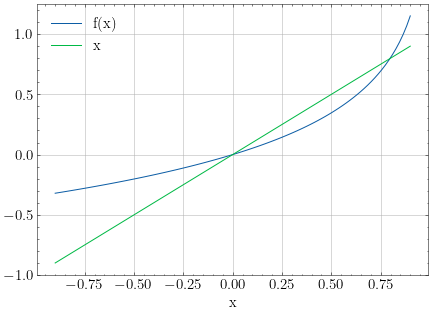

In [66]:
# Inspecting the problem graphically

def f_new(x):
    return -0.5*np.log(1-x)

x = np.linspace(-0.9, 0.9, 101)

plt.plot(x, f_new(x), label='f(x)')
plt.plot(x, x, label='x')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

In [71]:
# Solution around 0.7

relaxation_method(f_new, 0.01)

Converged at x = 6.165233089765411e-07 after 14 iterations.


Why sometimes our method doesn't converge? Let our solution be $x_0 = f(x_0)$ at the $i^{th}$ iteration

\begin{equation}
x_i = f(x_{i-1}).
\end{equation}

Taylor expanding the RHS around $x_0$:

\begin{equation}
x_i = f(x_0) + (x_{i-1} - x_0)f'(x_0) + ...
\end{equation}

but $f(x_0) = x_0$. Defining $\Delta x_i = (x_i - x_0)$,

\begin{equation}
x_i - x_0 \approx (x_{i-1} - x_0)f'(x_0)
\end{equation}

\begin{equation}
\Delta x_i \approx \Delta x_{i-1}f'(x_0)
\end{equation}

\begin{equation}
\frac{\Delta x_i}{\Delta x_{i-1}} \approx f'(x_0)
\end{equation}

Therefore, our result will converge if $|f'(x_0)| < 1$.

## Waves in 1D

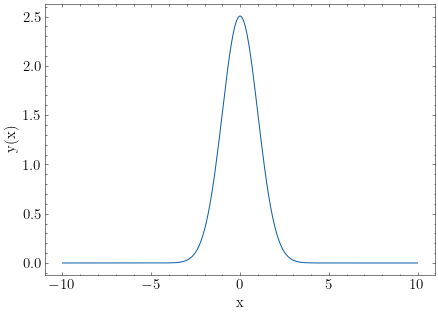

In [50]:
# Gaussian pulse

def pulse(x, mu = 0.0, sigma = 1.0):
    return (1/sigma*np.sqrt(2*np.pi))*np.exp(-0.5*(x - mu)**2 / sigma**2)

dx = 0.1
x = np.arange(-10, 10+dx, dx)

plt.plot(x, pulse(x, mu=0.0, sigma=1.0))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

In [45]:
# 

v = 1.0

dx = 0.1
x = np.arange(-10, 10+dx, dx)

dt = dx/v
t = np.arange(0, 5+dt, dt)

Nx = len(x)
Nt = len(t)

u = np.zeros((100, len(x)))

In [46]:
# Setting initial conditions

u[0] = pulse(x)
u[1] = pulse(x)

u[0][0] = 0.0
u[0][-1] = 0.0

u[1][0] = 0.0
u[1][-1] = 0.0

In [47]:
for n in range(1,99):
    for k in range(1, len(x)-1):
        u[n+1][k] = u[n][k+1] + u[n][k-1] - u[n-1][k] 

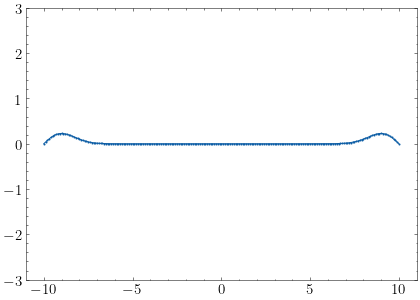

In [51]:
# Doing a simple animation with display

from IPython import display
from time import sleep

for i in range(100):
    plt.plot(x, u[i], marker='o', ms='1')
    display.clear_output(wait=True)
    plt.ylim(-3.0, 3.0)
    plt.show()  